In [5]:
import HSXPLR as HSXPLR
import networkx as nx
from itertools import combinations
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.animation as manimation

In [26]:
file_name = 'CAYDEN_LowQuality'
h_surf = HSXPLR.HSXPLR(file_name+'.cxs')
edgs =[]
for tria in h_surf.HSsf_vtxidx:
    for edg in (combinations(tria, 2)):
        edgs.append(edg)

gp = nx.Graph(edgs)

transM = np.zeros([h_surf.HSsf_num_vtx, h_surf.HSsf_num_vtx])
for nd, aj in gp.adjacency():
    for ky in aj:
        # transM[nd][ky] = h_surf.VTX_dnorm[ky]
        transM[nd][ky] = h_surf.VTX_di[ky]
#         transM[nd][ky] = h_surf.VTX_de[ky]

# transM_nrd = (transM/transM.sum(1)[:,np.newaxis]).T
transM_nrd = transM/transM.sum(1)[:,np.newaxis]

stt_vec = (1/float(h_surf.HSsf_num_vtx))*np.ones(h_surf.HSsf_num_vtx)
stt_vec = stt_vec[:, np.newaxis]

In [8]:
cpd_c = 0
clrr = []

# clrmp = mpl.cm.get_cmap('jet')
clrmp = mpl.cm.get_cmap('bwr_r')

clrrt = []
for tri_idx in h_surf.HSsf_vtxidx:
#     tri_clr = [mof_test.VTX_dnorm[vcl] for vcl in tri_idx]
#     tri_clr = [h_surf.VTX_de[vcl] for vcl in tri_idx]
    tri_clr = [stt_vec[vcl] for vcl in tri_idx]
    clrrt.append(np.average(tri_clr))
#     chem_fml.append(po_size.loc[cpdn][0])
#     xtal_lst.append(po_size.loc[cpdn][-1])
# clrnorm = mpl.colors.Normalize(min(clrrt), max(clrrt))
clrnorm = mpl.colors.Normalize(-1.0, 1.0)
# clrnorm = mpl.colors.LogNorm(min(clrr), max(clrr))

clrr=[]
for cpdn in clrrt:
    clrr.append(clrmp(clrnorm(cpdn)))

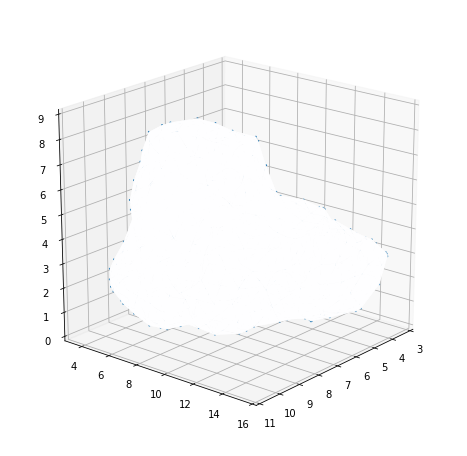

In [9]:
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, projection='3d')
# surf = ax1.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
#                        linewidth=0, antialiased=False)
# ax1.plot_trisurf(X, Y, Z, linewidth=0.2, antialiased=True)
# ax1.plot_wireframe(X,Y,Z)

x = np.array(h_surf.HSsf_vtx).T[0]
y = np.array(h_surf.HSsf_vtx).T[1]
z = np.array(h_surf.HSsf_vtx).T[2]

vertices = h_surf.HSsf_vtxidx

# tupleList = zip(x, y, z)
tupleList = np.array(h_surf.HSsf_vtx)

poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
ax1.scatter(x,y,z,s=1)
collection = Poly3DCollection(poly3d, linewidths=.0 ,edgecolor=None, alpha=1)
collection.set_facecolors(clrr)
ax1.add_collection3d(collection)
ax1.set_ylim(3,16)
ax1.set_xlim(3,11)
ax1.set_zlim(0,9)
ax1.view_init(20,40)



In [10]:
mpl.use("Agg")

FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Hirshfeld_Surface_Random_walk', artist='Tianmu',
                comment='Graph')
writer = FFMpegWriter(fps=10, metadata=metadata)

/Users/tianmuzhang/miniconda/envs/scitfcpy36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/tianmuzhang/miniconda/envs/scitfcpy36/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/tianmuzhang/miniconda/envs/scitfcpy36/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/tianmuzhang/miniconda/envs/scitfcpy36/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/tianmuzhang/miniconda/envs/scitfcpy36/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.st

In [ ]:
for ii in range(10):
    stt_vect = np.dot(transM_nrd.T, stt_vec)
    print(np.linalg.norm(stt_vect-stt_vec))
    stt_vec = stt_vect

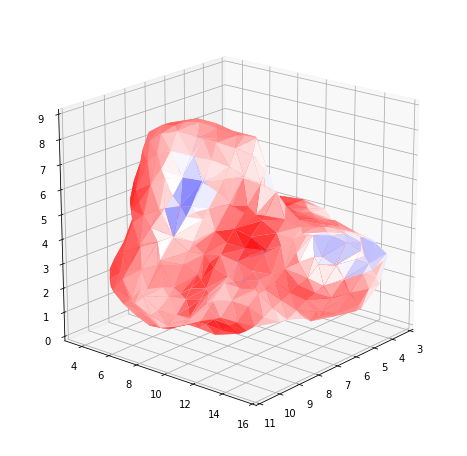

In [29]:
clrmp = mpl.cm.get_cmap('bwr_r')
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111, projection='3d')

stt_vec = (1/float(h_surf.HSsf_num_vtx))*np.ones(h_surf.HSsf_num_vtx)
stt_vec = stt_vec[:, np.newaxis]
for ii in range(100):
    ax1.clear()
    stt_vec = np.dot(transM_nrd.T, stt_vec)
stt_vec_clr = stt_vec
stt_vec = (1/float(h_surf.HSsf_num_vtx))*np.ones(h_surf.HSsf_num_vtx)
stt_vec = stt_vec[:, np.newaxis]

clrrt = []
for tri_idx in h_surf.HSsf_vtxidx:
    tri_clr = [stt_vec[vcl] for vcl in tri_idx]
    clrrt.append(np.average(tri_clr))
# clrnorm = mpl.colors.Normalize(0.0005, 0.001)
clrnorm = mpl.colors.Normalize(stt_vec_clr.min(), stt_vec_clr.max())
clrr=[]
for cpdn in clrrt:
    clrr.append(clrmp(clrnorm(cpdn)))

x = np.array(h_surf.HSsf_vtx).T[0]
y = np.array(h_surf.HSsf_vtx).T[1]
z = np.array(h_surf.HSsf_vtx).T[2]

vertices = h_surf.HSsf_vtxidx

# tupleList = zip(x, y, z)
tupleList = np.array(h_surf.HSsf_vtx)

poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
# ax1.scatter(x,y,z,s=1)
collection = Poly3DCollection(poly3d, linewidths=.0 ,edgecolor=None, alpha=1)
collection.set_facecolors(clrr)
ax1.add_collection3d(collection)
ax1.set_ylim(3,16)
ax1.set_xlim(3,11)
ax1.set_zlim(0,9)
ax1.view_init(20,40)

# with writer.saving(fig1, "HS_rdwk_test.mp4", 200):
with writer.saving(fig1, "HS_rdwk_test.mp4", 100):
#     writer.grab_frame()
    for ii in range(50):
        ax1.clear()
        stt_vec = np.dot(transM_nrd.T, stt_vec)
        
        clrrt = []
        for tri_idx in h_surf.HSsf_vtxidx:
            tri_clr = [stt_vec[vcl] for vcl in tri_idx]
            clrrt.append(np.average(tri_clr))
        clrr=[]
        for cpdn in clrrt:
            clrr.append(clrmp(clrnorm(cpdn)))
        
        collection.set_facecolors(clrr)
        ax1.add_collection3d(collection)
        ax1.set_ylim(3,16)
        ax1.set_xlim(3,11)
        ax1.set_zlim(0,9)
        ax1.view_init(20,40)
        writer.grab_frame()
        
        